In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
# PassengerId=test_df['PassengerId']
# test_df=test_df.drop('PassengerId', axis=1)
# train_df=train_df.drop('PassengerId', axis=1)

In [8]:
X_train=train_df.drop('Transported', axis=1)
y_train= train_df['Transported']

In [9]:
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [10]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time


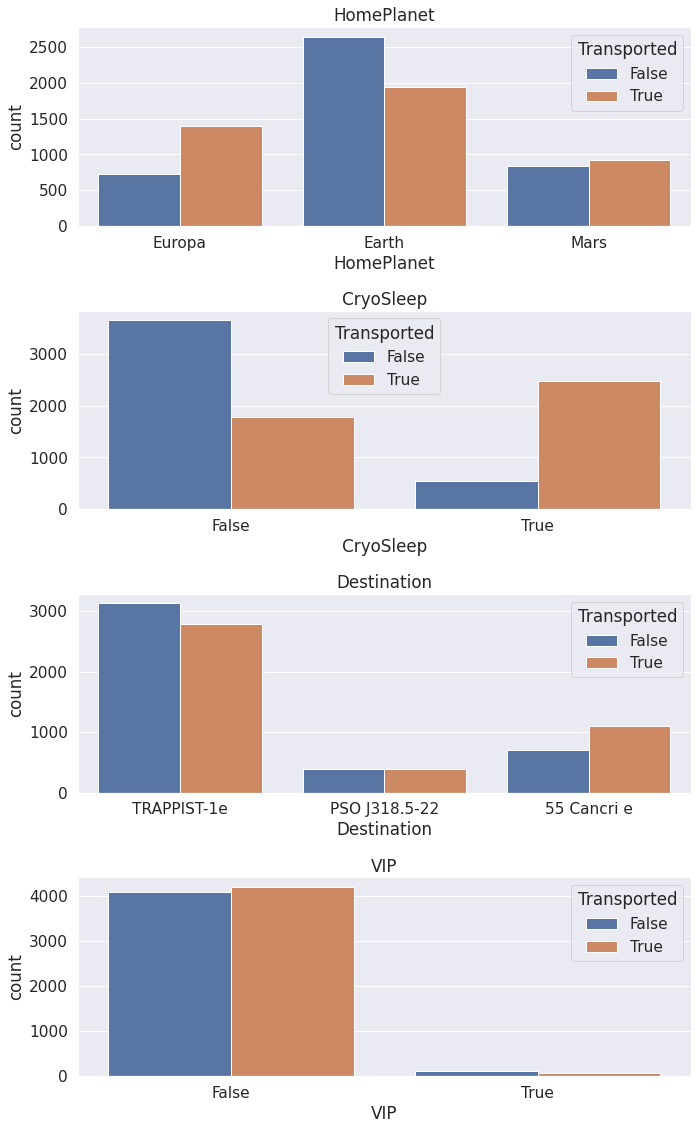

In [11]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [12]:
X_train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [13]:
X_train.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

Text(0.5, 1.0, 'Group size')

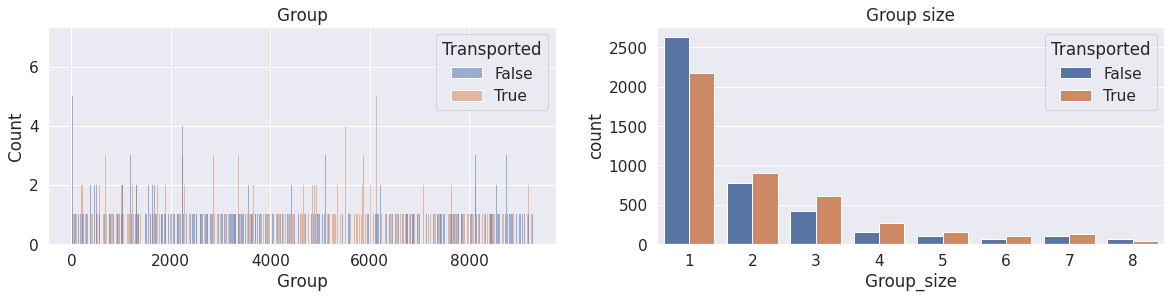

In [14]:
# New feature - Group
train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test_df['Group'] = test_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
train_df['Group_size']=train_df['Group'].map(lambda x: pd.concat([train_df['Group'], test_df['Group']]).value_counts()[x])
test_df['Group_size']=test_df['Group'].map(lambda x: pd.concat([train_df['Group'], test_df['Group']]).value_counts()[x])
# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train_df, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train_df, x='Group_size', hue='Transported')
plt.title('Group size')

(0.0, 3000.0)

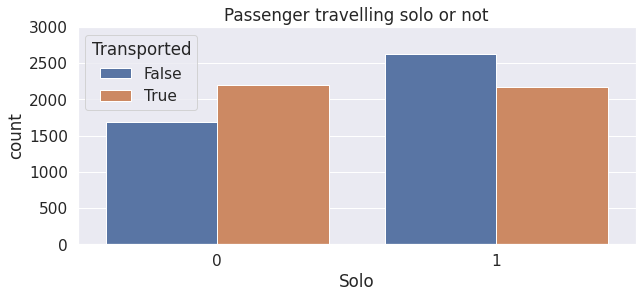

In [15]:
# New feature
train_df['Solo']=(train_df['Group_size']==1).astype(int)
test_df['Solo']=(test_df['Group_size']==1).astype(int)

# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

In [16]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Group_size,Solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,2,0


In [17]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Group_size,Solo
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,1,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,1,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,1,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,1,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,2,0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,1,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,1,1
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,1,1


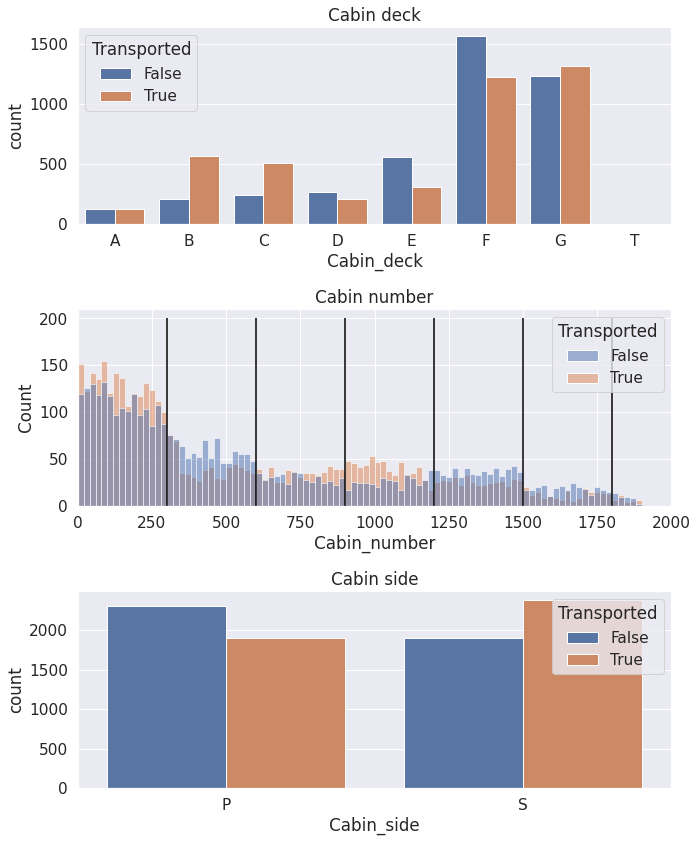

In [18]:
# Replace NaN's with outliers for now (so we can split feature)
train_df['Cabin'].fillna('Z/9999/Z', inplace=True)
test_df['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
train_df['Cabin_deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0])
train_df['Cabin_number'] = train_df['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train_df['Cabin_side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2])

# New features - test set
test_df['Cabin_deck'] = test_df['Cabin'].apply(lambda x: x.split('/')[0])
test_df['Cabin_number'] = test_df['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test_df['Cabin_side'] = test_df['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
train_df.loc[train_df['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train_df.loc[train_df['Cabin_number']==9999, 'Cabin_number']=np.nan
train_df.loc[train_df['Cabin_side']=='Z', 'Cabin_side']=np.nan
test_df.loc[test_df['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test_df.loc[test_df['Cabin_number']==9999, 'Cabin_number']=np.nan
test_df.loc[test_df['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train_df, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train_df, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

Text(0.5, 1.0, 'Family size')

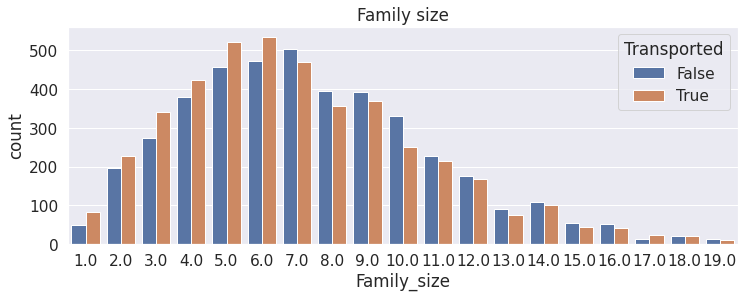

In [19]:
# Replace NaN's with outliers for now (so we can split feature)
train_df['Name'].fillna('Unknown Unknown', inplace=True)
test_df['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
train_df['Surname']=train_df['Name'].str.split().str[-1]
test_df['Surname']=test_df['Name'].str.split().str[-1]

# New feature - Family size
train_df['Family_size']=train_df['Surname'].map(lambda x: pd.concat([train_df['Surname'],test_df['Surname']]).value_counts()[x])
test_df['Family_size']=test_df['Surname'].map(lambda x: pd.concat([train_df['Surname'],test_df['Surname']]).value_counts()[x])

# Put Nan's back in (we will fill these later)
train_df.loc[train_df['Surname']=='Unknown','Surname']=np.nan
train_df.loc[train_df['Family_size']>100,'Family_size']=np.nan
test_df.loc[test_df['Surname']=='Unknown','Surname']=np.nan
test_df.loc[test_df['Family_size']>100,'Family_size']=np.nan

# Drop name (we don't need it anymore)
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=train_df, x='Family_size', hue='Transported')
plt.title('Family size')

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Group         8693 non-null   int64  
 13  Group_size    8693 non-null   int64  
 14  Solo          8693 non-null   int64  
 15  Cabin_deck    8494 non-null   object 
 16  Cabin_number  8494 non-null   float64
 17  Cabin_side    8494 non-null   object 
 18  Surname       8493 non-null 

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Group         4277 non-null   int64  
 12  Group_size    4277 non-null   int64  
 13  Solo          4277 non-null   int64  
 14  Cabin_deck    4177 non-null   object 
 15  Cabin_number  4177 non-null   float64
 16  Cabin_side    4177 non-null   object 
 17  Surname       4183 non-null   object 
 18  Family_size   4183 non-null 

In [22]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Group_size,Solo,Cabin_number,Family_size
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8693.000000,8494.000000,8493.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4633.389624,2.035546,0.552744,600.367671,7.227952
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2671.028856,1.596347,0.497239,511.867226,3.497773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000,0.000000,167.250000,5.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,1.000000,1.000000,427.000000,7.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6883.000000,3.000000,1.000000,999.000000,9.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,1.000000,1894.000000,19.000000


In [23]:
train_df.Group.value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: Group, Length: 6217, dtype: int64

In [24]:
mylist = list(train_df.select_dtypes(include=['int64', 'float64']).columns)

In [25]:
mylist

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Group',
 'Group_size',
 'Solo',
 'Cabin_number',
 'Family_size']

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median', missing_values=np.nan)

imputer.fit(train_df[mylist])

train_df[mylist] = imputer.transform(train_df[mylist])

test_df[mylist] = imputer.transform(test_df[mylist])

In [27]:
train_df[mylist].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Group_size,Solo,Cabin_number,Family_size
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820,4633.389624,2.035546,0.552744,596.398942,7.222708
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417,2671.028856,1.596347,0.497239,506.637799,3.457467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000,0.000000,173.000000,5.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,1.000000,1.000000,427.000000,7.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,6883.000000,3.000000,1.000000,983.000000,9.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,1.000000,1894.000000,19.000000


In [28]:
cat = list(train_df.select_dtypes(include=['object']).columns)

In [29]:
cat

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin_deck',
 'Cabin_side',
 'Surname']

In [30]:
cat= ['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin_deck',
 'Cabin_side',
 'Surname']

In [31]:
train_df[cat].HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [32]:
train_df[cat].Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [33]:
unique_category = []
for i in train_df[cat].columns:
    if train_df[cat][i].unique().shape[0] <= 20000:
        unique_category.append(i)
        print(i, train_df[cat][i].unique(), "\n")

HomePlanet ['Europa' 'Earth' 'Mars' nan] 

CryoSleep [False True nan] 

Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 

VIP [False True nan] 

Cabin_deck ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T'] 

Cabin_side ['P' 'S' nan] 

Surname ['Ofracculy' 'Vines' 'Susent' ... 'Fort' 'Workmanson' 'Sionerorly'] 



In [34]:
train_df[cat]

,HomePlanet,CryoSleep,Destination,VIP,Cabin_deck,Cabin_side,Surname
0,Europa,False,TRAPPIST-1e,False,B,P,Ofracculy
1,Earth,False,TRAPPIST-1e,False,F,S,Vines
2,Europa,False,TRAPPIST-1e,True,A,S,Susent
3,Europa,False,TRAPPIST-1e,False,A,S,Susent
4,Earth,False,TRAPPIST-1e,False,F,S,Santantines
...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,A,P,Noxnuther
8689,Earth,True,PSO J318.5-22,False,G,S,Mondalley
8690,Earth,False,TRAPPIST-1e,False,G,S,Connon
8691,Europa,False,55 Cancri e,False,E,S,Hontichre


In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

imputer.fit(train_df[cat])

train_df[cat] = imputer.transform(train_df[cat])

test_df[cat]= imputer.transform(test_df[cat])

In [36]:
train_df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   8693 non-null   object
 1   CryoSleep    8693 non-null   object
 2   Destination  8693 non-null   object
 3   VIP          8693 non-null   object
 4   Cabin_deck   8693 non-null   object
 5   Cabin_side   8693 non-null   object
 6   Surname      8693 non-null   object
dtypes: object(7)
memory usage: 475.5+ KB


In [37]:
test_df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   4277 non-null   object
 1   CryoSleep    4277 non-null   object
 2   Destination  4277 non-null   object
 3   VIP          4277 non-null   object
 4   Cabin_deck   4277 non-null   object
 5   Cabin_side   4277 non-null   object
 6   Surname      4277 non-null   object
dtypes: object(7)
memory usage: 234.0+ KB


In [38]:
unique_category = []
for i in train_df[cat].columns:
    if train_df[cat][i].unique().shape[0] <= 20000:
        unique_category.append(i)
        print(i, train_df[cat][i].unique(), "\n")

HomePlanet ['Europa' 'Earth' 'Mars'] 

CryoSleep [False True] 

Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e'] 

VIP [False True] 

Cabin_deck ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T'] 

Cabin_side ['P' 'S'] 

Surname ['Ofracculy' 'Vines' 'Susent' ... 'Fort' 'Workmanson' 'Sionerorly'] 



In [39]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(train_df[mylist])
train_df[mylist] = transformer.transform(train_df[mylist])
test_df[mylist] = transformer.transform(test_df[mylist])

In [40]:
train_df[mylist]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Group_size,Solo,Cabin_number,Family_size
0,0.705882,0.000000,0.000000,0.000000,0.000000,0.000,-1.014242,0.0,0.0,-0.527160,-1.00
1,-0.176471,2.658537,0.147541,1.136364,10.358491,1.100,-1.014023,0.0,0.0,-0.527160,-0.75
2,1.823529,1.048780,58.622951,0.000000,126.698113,1.225,-1.013804,0.5,-1.0,-0.527160,0.00
3,0.352941,0.000000,21.032787,16.863636,62.811321,4.825,-1.013804,0.5,-1.0,-0.527160,0.00
4,-0.647059,7.390244,1.147541,6.863636,10.660377,0.050,-1.013585,0.0,0.0,-0.525926,0.50
...,...,...,...,...,...,...,...,...,...,...,...
8688,0.823529,0.000000,111.786885,0.000000,31.000000,1.850,1.017967,0.0,0.0,-0.406173,-1.00
8689,-0.529412,0.000000,0.000000,0.000000,0.000000,0.000,1.018405,0.0,0.0,1.323457,-0.50
8690,-0.058824,0.000000,0.000000,85.090909,0.018868,0.000,1.018624,0.0,0.0,1.324691,0.25
8691,0.294118,0.000000,17.196721,0.000000,6.660377,80.875,1.018843,0.5,-1.0,0.223457,0.00


In [41]:
train_df['HomePlanet'].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [42]:
train_df['HomePlanet'].replace(['Europa' ,'Earth', 'Mars'],
                        [1,0,2], inplace=True)
test_df['HomePlanet'].replace(['Europa' ,'Earth', 'Mars'],
                        [1,0,2], inplace=True)

In [43]:
train_df['CryoSleep'].replace([False ,True],
                        [0,1], inplace=True)
test_df['CryoSleep'].replace([False ,True],
                        [0,1], inplace=True)

In [44]:
train_df['VIP'].replace([False ,True],
                        [0,1], inplace=True)
test_df['VIP'].replace([False ,True],
                        [0,1], inplace=True)

In [45]:
train_df['Cabin_side'].replace(['P', 'S'],
                        [0,1], inplace=True)
test_df['Cabin_side'].replace(['P' ,'S'],
                        [0,1], inplace=True)

In [46]:
catego = list(train_df.select_dtypes(include=['object']).columns)

In [47]:
oe=['Destination', 'Cabin_deck']

In [48]:
test_df[oe]

,Destination,Cabin_deck
0,TRAPPIST-1e,G
1,TRAPPIST-1e,F
2,55 Cancri e,C
3,TRAPPIST-1e,C
4,TRAPPIST-1e,F
...,...,...
4272,TRAPPIST-1e,G
4273,TRAPPIST-1e,F
4274,55 Cancri e,D
4275,TRAPPIST-1e,D


In [49]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
transformer = enc.fit(train_df[oe])
train_df[oe] = transformer.transform(train_df[oe])
test_df[oe] = transformer.transform(test_df[oe])

In [50]:
train_df[oe]

,Destination,Cabin_deck
0,2.0,1.0
1,2.0,5.0
2,2.0,0.0
3,2.0,0.0
4,2.0,5.0
...,...,...
8688,0.0,0.0
8689,1.0,6.0
8690,2.0,6.0
8691,0.0,4.0


In [51]:
test_df[oe]

,Destination,Cabin_deck
0,2.0,6.0
1,2.0,5.0
2,0.0,2.0
3,2.0,2.0
4,2.0,5.0
...,...,...
4272,2.0,6.0
4273,2.0,5.0
4274,0.0,3.0
4275,2.0,3.0


In [52]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder
CBE_encoder = CatBoostEncoder()
train_cbe = CBE_encoder.fit_transform(train_df['Surname'], y_train)
test_cbe = CBE_encoder.transform(test_df['Surname'])

In [53]:
train_cbe

,Surname
0,0.503624
1,0.503624
2,0.503624
3,0.251812
4,0.503624
...,...
8688,0.501208
8689,0.251812
8690,0.917271
8691,0.100725


In [54]:
train_df['Surname']

0         Ofracculy
1             Vines
2            Susent
3            Susent
4       Santantines
           ...     
8688      Noxnuther
8689      Mondalley
8690         Connon
8691      Hontichre
8692      Hontichre
Name: Surname, Length: 8693, dtype: object

In [55]:
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Group_size,Solo,Cabin_deck,Cabin_number,Cabin_side,Surname,Family_size
0,0001_01,1,0,2.0,0.705882,0,0.000000,0.000000,0.000000,0.000000,0.000,False,-1.014242,0.0,0.0,1.0,-0.527160,0,Ofracculy,-1.00
1,0002_01,0,0,2.0,-0.176471,0,2.658537,0.147541,1.136364,10.358491,1.100,True,-1.014023,0.0,0.0,5.0,-0.527160,1,Vines,-0.75
2,0003_01,1,0,2.0,1.823529,1,1.048780,58.622951,0.000000,126.698113,1.225,False,-1.013804,0.5,-1.0,0.0,-0.527160,1,Susent,0.00
3,0003_02,1,0,2.0,0.352941,0,0.000000,21.032787,16.863636,62.811321,4.825,False,-1.013804,0.5,-1.0,0.0,-0.527160,1,Susent,0.00
4,0004_01,0,0,2.0,-0.647059,0,7.390244,1.147541,6.863636,10.660377,0.050,True,-1.013585,0.0,0.0,5.0,-0.525926,1,Santantines,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0.0,0.823529,1,0.000000,111.786885,0.000000,31.000000,1.850,False,1.017967,0.0,0.0,0.0,-0.406173,0,Noxnuther,-1.00
8689,9278_01,0,1,1.0,-0.529412,0,0.000000,0.000000,0.000000,0.000000,0.000,False,1.018405,0.0,0.0,6.0,1.323457,1,Mondalley,-0.50
8690,9279_01,0,0,2.0,-0.058824,0,0.000000,0.000000,85.090909,0.018868,0.000,True,1.018624,0.0,0.0,6.0,1.324691,1,Connon,0.25
8691,9280_01,1,0,0.0,0.294118,0,0.000000,17.196721,0.000000,6.660377,80.875,False,1.018843,0.5,-1.0,4.0,0.223457,1,Hontichre,0.00


In [56]:
num=list(train_df.select_dtypes(include=['int64','float64' ]).columns)

In [57]:
train_df[num]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Group_size,Solo,Cabin_deck,Cabin_number,Cabin_side,Family_size
0,1,0,2.0,0.705882,0,0.000000,0.000000,0.000000,0.000000,0.000,-1.014242,0.0,0.0,1.0,-0.527160,0,-1.00
1,0,0,2.0,-0.176471,0,2.658537,0.147541,1.136364,10.358491,1.100,-1.014023,0.0,0.0,5.0,-0.527160,1,-0.75
2,1,0,2.0,1.823529,1,1.048780,58.622951,0.000000,126.698113,1.225,-1.013804,0.5,-1.0,0.0,-0.527160,1,0.00
3,1,0,2.0,0.352941,0,0.000000,21.032787,16.863636,62.811321,4.825,-1.013804,0.5,-1.0,0.0,-0.527160,1,0.00
4,0,0,2.0,-0.647059,0,7.390244,1.147541,6.863636,10.660377,0.050,-1.013585,0.0,0.0,5.0,-0.525926,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0.0,0.823529,1,0.000000,111.786885,0.000000,31.000000,1.850,1.017967,0.0,0.0,0.0,-0.406173,0,-1.00
8689,0,1,1.0,-0.529412,0,0.000000,0.000000,0.000000,0.000000,0.000,1.018405,0.0,0.0,6.0,1.323457,1,-0.50
8690,0,0,2.0,-0.058824,0,0.000000,0.000000,85.090909,0.018868,0.000,1.018624,0.0,0.0,6.0,1.324691,1,0.25
8691,1,0,0.0,0.294118,0,0.000000,17.196721,0.000000,6.660377,80.875,1.018843,0.5,-1.0,4.0,0.223457,1,0.00


In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   float64
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Group         8693 non-null   float64
 13  Group_size    8693 non-null   float64
 14  Solo          8693 non-null   float64
 15  Cabin_deck    8693 non-null   float64
 16  Cabin_number  8693 non-null   float64
 17  Cabin_side    8693 non-null   int64  
 18  Surname       8693 non-null 

In [59]:
X_train= pd.concat([train_cbe, train_df[num]], axis=1)
X_test= pd.concat([test_cbe, test_df[num]], axis=1)

In [60]:
X_train

,Surname,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Group_size,Solo,Cabin_deck,Cabin_number,Cabin_side,Family_size
0,0.503624,1,0,2.0,0.705882,0,0.000000,0.000000,0.000000,0.000000,0.000,-1.014242,0.0,0.0,1.0,-0.527160,0,-1.00
1,0.503624,0,0,2.0,-0.176471,0,2.658537,0.147541,1.136364,10.358491,1.100,-1.014023,0.0,0.0,5.0,-0.527160,1,-0.75
2,0.503624,1,0,2.0,1.823529,1,1.048780,58.622951,0.000000,126.698113,1.225,-1.013804,0.5,-1.0,0.0,-0.527160,1,0.00
3,0.251812,1,0,2.0,0.352941,0,0.000000,21.032787,16.863636,62.811321,4.825,-1.013804,0.5,-1.0,0.0,-0.527160,1,0.00
4,0.503624,0,0,2.0,-0.647059,0,7.390244,1.147541,6.863636,10.660377,0.050,-1.013585,0.0,0.0,5.0,-0.525926,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.501208,1,0,0.0,0.823529,1,0.000000,111.786885,0.000000,31.000000,1.850,1.017967,0.0,0.0,0.0,-0.406173,0,-1.00
8689,0.251812,0,1,1.0,-0.529412,0,0.000000,0.000000,0.000000,0.000000,0.000,1.018405,0.0,0.0,6.0,1.323457,1,-0.50
8690,0.917271,0,0,2.0,-0.058824,0,0.000000,0.000000,85.090909,0.018868,0.000,1.018624,0.0,0.0,6.0,1.324691,1,0.25
8691,0.100725,1,0,0.0,0.294118,0,0.000000,17.196721,0.000000,6.660377,80.875,1.018843,0.5,-1.0,4.0,0.223457,1,0.00


In [61]:
X_test

,Surname,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Group_size,Solo,Cabin_deck,Cabin_number,Cabin_side,Family_size
0,0.500725,0,1,2.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000,-1.011613,0.0,0.0,6.0,-0.523457,1,0.25
1,0.625906,0,0,2.0,-0.470588,0,0.000000,0.147541,0.000000,53.264151,0.000,-1.010517,0.0,0.0,5.0,-0.522222,1,-0.75
2,0.583937,1,1,0.0,0.235294,0,0.000000,0.000000,0.000000,0.000000,0.000,-1.010298,0.0,0.0,2.0,-0.527160,1,-0.25
3,0.503624,1,0,2.0,0.647059,0,0.000000,109.049180,0.000000,3.415094,14.625,-1.009860,0.0,0.0,2.0,-0.525926,1,-1.25
4,0.501208,0,0,2.0,-0.411765,0,0.243902,0.000000,28.863636,0.000000,0.000,-1.009422,0.0,0.0,5.0,-0.520988,1,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.500518,0,1,2.0,0.411765,0,0.000000,0.000000,0.000000,0.000000,0.000,1.015776,0.5,-1.0,6.0,1.319753,1,0.75
4273,0.100725,0,0,2.0,0.882353,0,0.000000,13.885246,0.772727,0.188679,3.600,1.016433,0.0,0.0,5.0,0.000000,1,-0.25
4274,0.503624,2,1,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000,1.016871,0.0,0.0,3.0,-0.161728,0,-0.75
4275,0.834541,1,0,2.0,0.000000,0,0.000000,43.934426,0.000000,0.000000,13.075,1.017309,0.0,0.0,3.0,-0.160494,0,0.00


In [62]:
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [63]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=100):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:]

pairs_corr = get_top_abs_correlations(pd.concat([X_train, y_train],axis=1))

data = pd.DataFrame(pairs_corr).reset_index()
data.columns = ["Variable_A", "Variable_B", "Corr"]

display(data)
mask = data["Corr"] >.8
display(data[mask])
cols_to_drop = data.loc[mask,"Variable_B"].drop_duplicates().tolist()
cols_to_drop

,Variable_A,Variable_B,Corr
0,Group_size,Solo,0.721192
1,Group,Cabin_number,0.671734
2,Cabin_deck,Cabin_number,0.526808
3,CryoSleep,Transported,0.460132
4,HomePlanet,Cabin_deck,0.408532
...,...,...,...
166,VIP,Group_size,0.002856
167,ShoppingMall,Cabin_number,0.002353
168,HomePlanet,Cabin_side,0.000636
169,RoomService,Group,0.000375


,Variable_A,Variable_B,Corr


[]

In [64]:
!pip install lofo-importance

In [65]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
import xgboost as xgb

In [66]:
kfold= StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

In [67]:
df= pd.concat([X_train, y_train], axis=1)

In [68]:
df

,Surname,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Group_size,Solo,Cabin_deck,Cabin_number,Cabin_side,Family_size,Transported
0,0.503624,1,0,2.0,0.705882,0,0.000000,0.000000,0.000000,0.000000,0.000,-1.014242,0.0,0.0,1.0,-0.527160,0,-1.00,False
1,0.503624,0,0,2.0,-0.176471,0,2.658537,0.147541,1.136364,10.358491,1.100,-1.014023,0.0,0.0,5.0,-0.527160,1,-0.75,True
2,0.503624,1,0,2.0,1.823529,1,1.048780,58.622951,0.000000,126.698113,1.225,-1.013804,0.5,-1.0,0.0,-0.527160,1,0.00,False
3,0.251812,1,0,2.0,0.352941,0,0.000000,21.032787,16.863636,62.811321,4.825,-1.013804,0.5,-1.0,0.0,-0.527160,1,0.00,False
4,0.503624,0,0,2.0,-0.647059,0,7.390244,1.147541,6.863636,10.660377,0.050,-1.013585,0.0,0.0,5.0,-0.525926,1,0.50,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.501208,1,0,0.0,0.823529,1,0.000000,111.786885,0.000000,31.000000,1.850,1.017967,0.0,0.0,0.0,-0.406173,0,-1.00,False
8689,0.251812,0,1,1.0,-0.529412,0,0.000000,0.000000,0.000000,0.000000,0.000,1.018405,0.0,0.0,6.0,1.323457,1,-0.50,False
8690,0.917271,0,0,2.0,-0.058824,0,0.000000,0.000000,85.090909,0.018868,0.000,1.018624,0.0,0.0,6.0,1.324691,1,0.25,True
8691,0.100725,1,0,0.0,0.294118,0,0.000000,17.196721,0.000000,6.660377,80.875,1.018843,0.5,-1.0,4.0,0.223457,1,0.00,False


  0%|          | 0/18 [00:00<?, ?it/s]

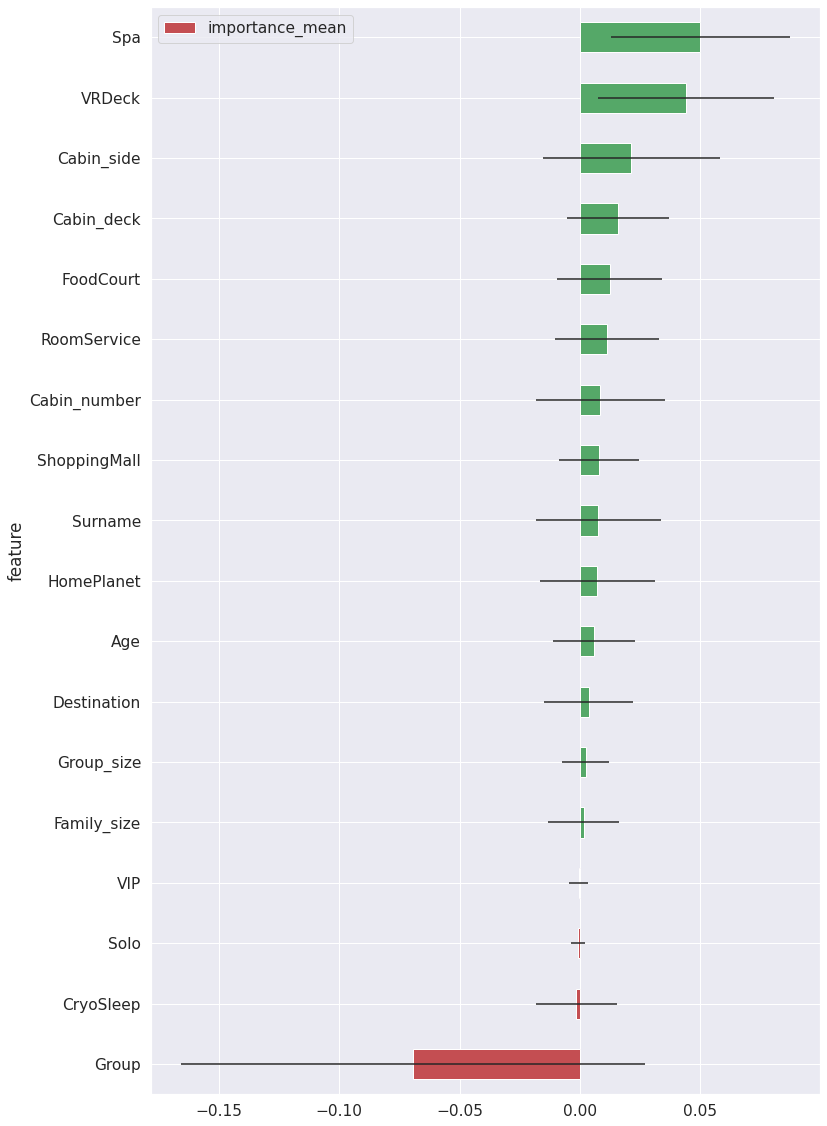

In [69]:
# define the binary target and the features
dataset = Dataset(df=df, target="Transported", features=[col for col in df.columns if col != "Transported"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=20, scoring="accuracy")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))

In [70]:
importance_df

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3,val_imp_4,val_imp_5,val_imp_6,...,val_imp_10,val_imp_11,val_imp_12,val_imp_13,val_imp_14,val_imp_15,val_imp_16,val_imp_17,val_imp_18,val_imp_19
0,Spa,0.050022,0.037141,0.020690,0.022989,0.025287,0.020690,0.064368,0.089655,0.098851,...,0.094253,0.027586,0.032184,0.025346,0.046083,0.036866,0.027650,0.020737,0.023041,0.013825
16,VRDeck,0.043928,0.036543,-0.004598,0.018391,0.025287,-0.002299,0.048276,0.059770,0.108046,...,0.068966,0.022989,0.039080,0.016129,0.029954,0.034562,0.016129,0.043779,0.027650,0.006912
12,Cabin_side,0.021386,0.036847,-0.025287,0.002299,0.011494,-0.006897,-0.002299,0.045977,0.103448,...,0.027586,0.013793,0.016092,0.013825,0.011521,0.023041,0.002304,0.002304,0.018433,-0.011521
4,Cabin_deck,0.015866,0.021094,0.006897,-0.002299,-0.002299,-0.004598,0.020690,0.036782,0.029885,...,-0.004598,0.039080,0.006897,-0.002304,0.009217,-0.006912,-0.002304,0.020737,0.009217,0.004608
15,FoodCourt,0.012423,0.021748,0.022989,0.009195,-0.004598,-0.011494,0.027586,0.032184,-0.025287,...,-0.011494,0.029885,-0.004598,0.013825,0.000000,0.011521,-0.002304,0.023041,0.036866,-0.004608
17,RoomService,0.011152,0.021585,0.022989,0.013793,-0.013793,-0.020690,0.034483,0.029885,0.004598,...,-0.002299,0.025287,-0.002299,0.018433,0.004608,-0.023041,0.004608,0.002304,0.000000,0.013825
13,Cabin_number,0.008397,0.026832,-0.009195,-0.009195,0.000000,-0.006897,0.002299,0.009195,-0.009195,...,0.022989,0.004598,0.011494,0.018433,0.009217,0.011521,0.009217,0.004608,0.006912,-0.002304
11,ShoppingMall,0.008052,0.016555,0.018391,-0.002299,-0.013793,-0.011494,0.004598,0.032184,-0.027586,...,0.006897,0.025287,0.002299,-0.002304,0.018433,-0.002304,0.011521,0.009217,0.009217,0.009217
6,Surname,0.007704,0.025953,-0.013793,0.002299,-0.020690,0.000000,-0.004598,0.036782,-0.034483,...,0.006897,0.018391,0.002299,0.000000,0.025346,-0.011521,-0.002304,0.006912,0.009217,0.000000
5,HomePlanet,0.007247,0.023750,-0.009195,0.009195,0.009195,-0.009195,0.011494,-0.004598,-0.027586,...,0.039080,0.009195,-0.004598,0.004608,0.018433,0.006912,0.002304,0.000000,0.013825,0.002304


In [71]:
importance_df.feature.tolist()

['Spa',
 'VRDeck',
 'Cabin_side',
 'Cabin_deck',
 'FoodCourt',
 'RoomService',
 'Cabin_number',
 'ShoppingMall',
 'Surname',
 'HomePlanet',
 'Age',
 'Destination',
 'Group_size',
 'Family_size',
 'VIP',
 'Solo',
 'CryoSleep',
 'Group']

In [72]:
finales=['Spa',
 'VRDeck',
 'Cabin_side',
 'Cabin_deck',
 'FoodCourt',
 'RoomService',
 'Cabin_number',
 'ShoppingMall',
 'Surname',
 'HomePlanet',
 'Age',
 'Destination',
 'Group_size',
 'Family_size']

In [73]:
X_train_f=X_train[finales]
X_test_f=X_test[finales]

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
import xgboost as xgb

In [75]:
kfold= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [76]:
# scoring = {'AUC': 'roc_auc', 'NLL': 'neg_log_loss'}

param_grid= {

#     "selectkbest__k": list(range(5,10,1)),

    "max_depth":[3,4,5,6,7,8,9,10],

    "learning_rate":[0.05,0.1,0.3],

    

    "n_estimators": [1000],

  

    "min_child_weight": [0,1,3,5],

    "gamma": [0,0.25,1.0],

    "reg_lambda":[0,1.0,10.0]

   

    

}

 

 

 

# kbest = SelectKBest()### modelo con ROC_AUC 10 variables

model=xgb.XGBClassifier(seed=42)

 

 

sh4=HalvingGridSearchCV(model, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=kfold,  verbose=True,

                        min_resources="exhaust", factor= 4 )

sh4.fit(X_train_f, y_train)

n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 40
max_resources_: 8693
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 864
n_resources: 40
Fitting 10 folds for each of 864 candidates, totalling 8640 fits
----------
iter: 1
n_candidates: 216
n_resources: 160
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
----------
iter: 2
n_candidates: 54
n_resources: 640
Fitting 10 folds for each of 54 candidates, totalling 540 fits
----------
iter: 3
n_candidates: 14
n_resources: 2560
Fitting 10 folds for each of 14 candidates, totalling 140 fits


HalvingGridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            inte...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                        

In [77]:
print("Best: %f using %s" % (sh4.best_score_, sh4.best_params_))

Best: 0.797134 using {'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000, 'reg_lambda': 0}


In [78]:
sh4.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=0, ...)

In [79]:
sh4_best = sh4.best_estimator_

In [80]:
preds=sh4_best.predict_proba(X_test_f)[:,1]

In [81]:
preds

array([0.5523398 , 0.02490839, 0.98818576, ..., 0.9169956 , 0.7337654 ,
       0.6366542 ], dtype=float32)

Text(0.5, 0, 'Probability')

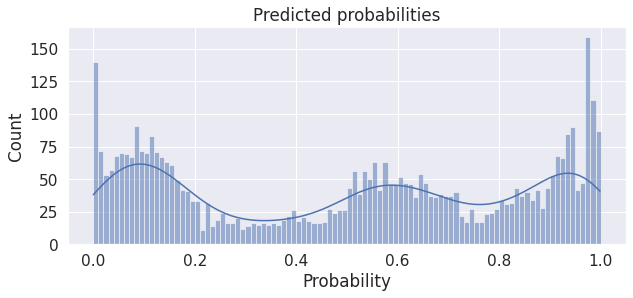

In [82]:
plt.figure(figsize=(10,4))
sns.histplot(preds, binwidth=0.01, kde=True)
plt.title('Predicted probabilities')
plt.xlabel('Probability')

In [83]:
# Proportion (in test set) we get from rounding
print(np.round(100*np.round(preds).sum()/len(preds),2))

55.13


Optimal threshold: 0.53


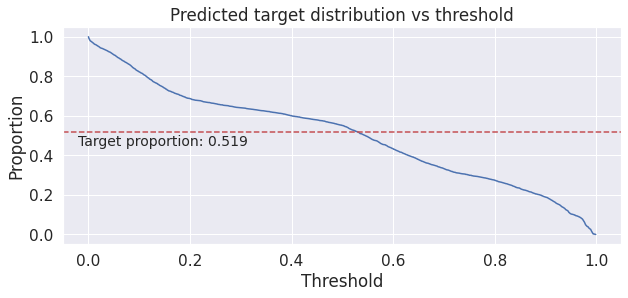

In [84]:
# Proportion of predicted positive (transported) classes
def preds_prop(preds_arr, thresh):
    pred_classes=(preds_arr>=thresh).astype(int)
    return pred_classes.sum()/len(pred_classes)

# Plot proportions across a range of thresholds
def plot_preds_prop(preds_arr):
    # Array of thresholds
    T_array=np.arange(0,1,0.001)
    
    # Calculate proportions
    prop=np.zeros(len(T_array))
    for i, T in enumerate(T_array):
        prop[i]=preds_prop(preds_arr, T)
        
    # Plot proportions
    plt.figure(figsize=(10,4))
    plt.plot(T_array, prop)
    target_prop=0.519         # Experiment with this value
    plt.axhline(y=target_prop, color='r', linestyle='--')
    plt.text(-0.02,0.45,f'Target proportion: {target_prop}', fontsize=14)
    plt.title('Predicted target distribution vs threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Proportion')
    
    # Find optimal threshold (the one that leads to the proportion being closest to target_prop)
    T_opt=T_array[np.abs(prop-target_prop).argmin()]
    print('Optimal threshold:', T_opt)
    return T_opt
    
T_opt=plot_preds_prop(preds)

In [85]:
T_opt

0.53

In [86]:
# Classify test set using optimal threshold
preds_tuned=(preds>=T_opt).astype(int)

Text(0.5, 1.0, 'Prediction distribution')

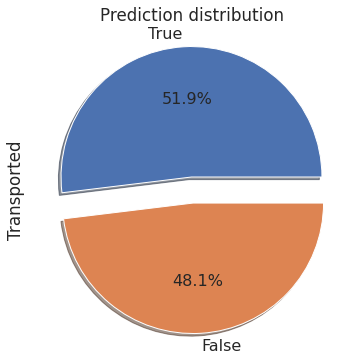

In [87]:
# Sample submission (to get right format)
sub=pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

# Add predictions
sub['Transported']=preds_tuned

# Replace 0 to False and 1 to True
sub=sub.replace({0:False, 1:True})

# Prediction distribution
plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

In [88]:
# Output to csv
sub.to_csv('submission.csv', index=False)